In [2]:
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import statsmodels.api as sm
from PSpline import *

In [3]:
p_spline = PSpline()

## Second order difference penalty in action with various tuning

Left boundary adjusted to min(x) =  0.0
Right boundary adjusted to max(x) =  1.0
Left boundary adjusted to min(x) =  0.04365256715695709
Right boundary adjusted to max(x) =  0.9935481302650762


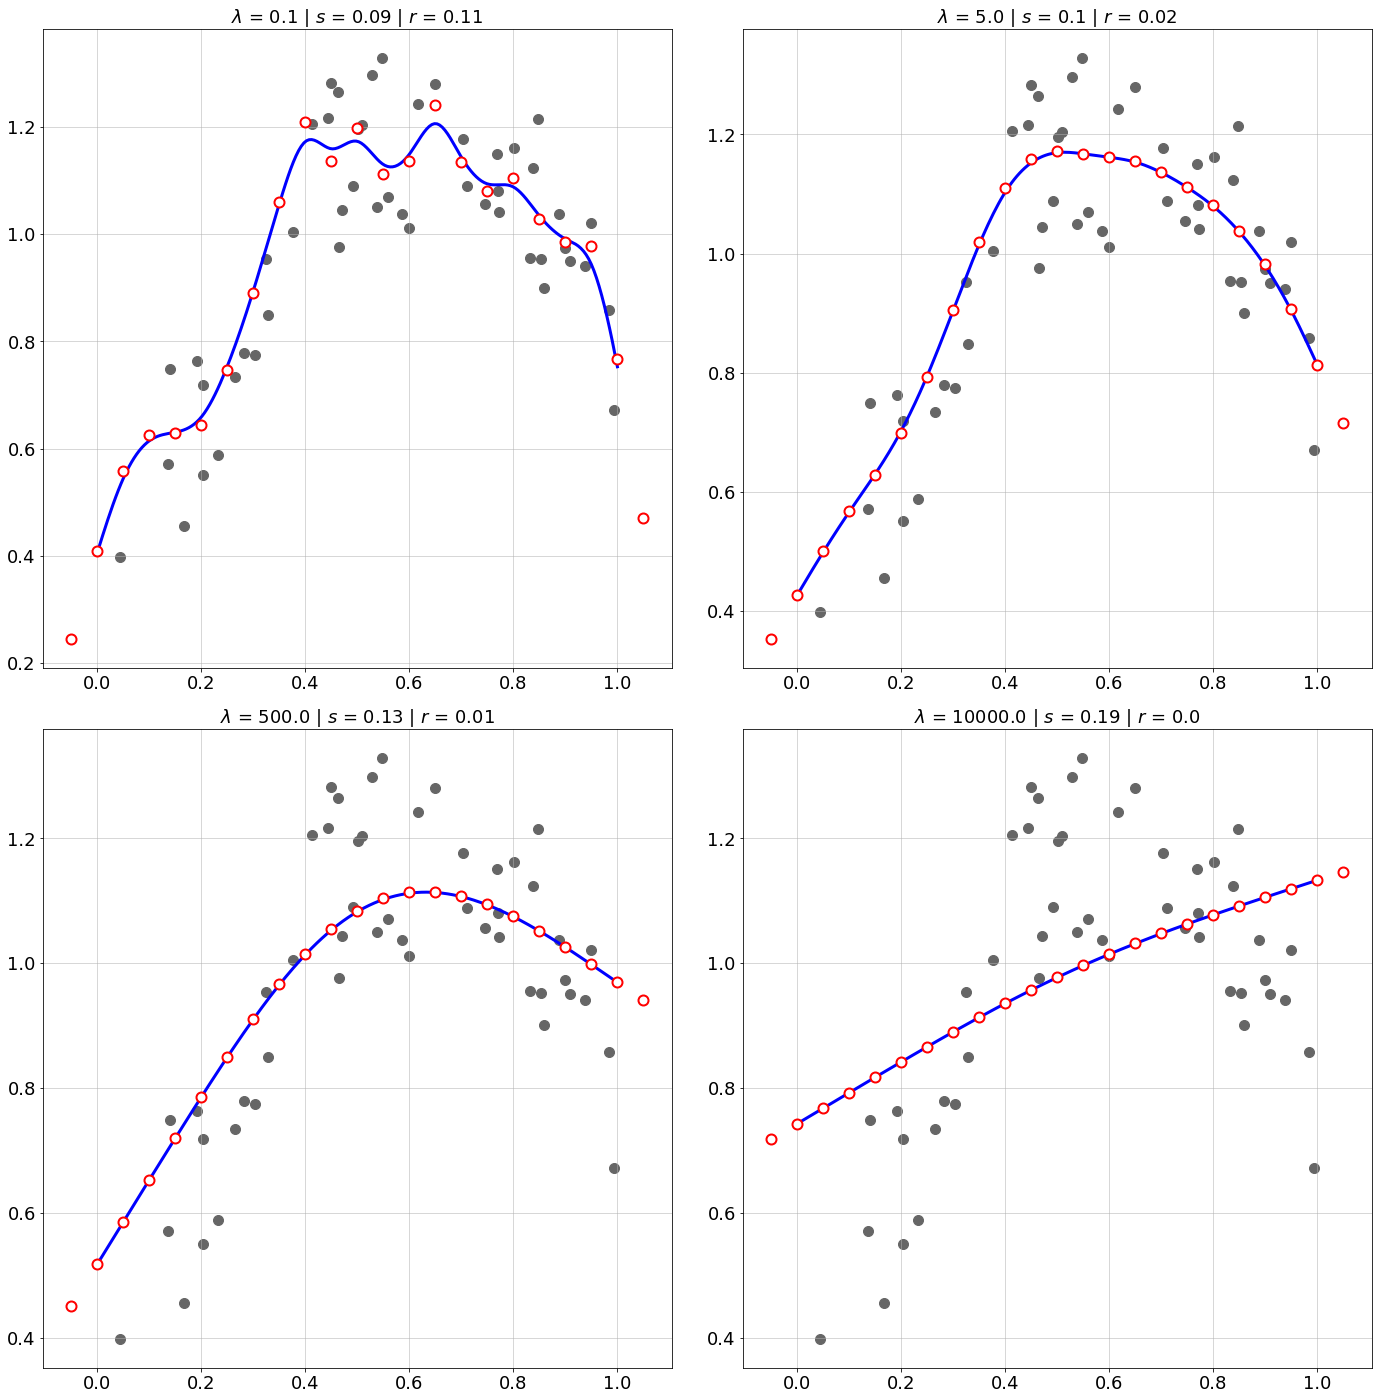

In [4]:
# Simulate data
m = 50
rng = np.random.default_rng(123)
x = np.random.uniform(size=m)
y = np.sin(2.5 * x) + np.random.normal(size=m) * 0.1 + 0.2

# Make basis and penalty
nu = 200
u = np.linspace(0, 1, nu)
n_seg = 20
Bu = p_spline.b_base(u, n_seg=n_seg)
B = p_spline.b_base(x, n_seg=n_seg)
nb = B.shape[1]
knots = (np.arange(nb) - 1) / n_seg
n = B.shape[1]
D = np.diff(np.eye(n), n=2).T
P = D.T @ D
BtB = B.T @ B
Bty = B.T @ y

# Compute coefficients
alphas = np.array([0.1, 5, 500, 10000])
A = np.array([np.linalg.solve(BtB + alpha * P, Bty) for alpha in alphas]).T
Z = Bu @ A
Mu = B @ A

# Generate the plots
fig_row, fig_col = 2, 2
fig, axs = plt.subplots(fig_row, fig_col, figsize=(20, 20))
fig.tight_layout(pad=4.0)
row, col = -1, 0
for j in range(4):
    # Compute roughness
    aj = A[:, j]
    da = D @ aj
    r = np.sqrt(np.sum(da ** 2) / (n - 2))
    s = np.sqrt(np.mean((y - Mu[:, j]) ** 2))

    # Scaled basis
    Bsc = B @ np.diag(aj)

    # Create data frames for ggplot
    Data = pd.DataFrame({'x': x, 'y': y})
    Zf = pd.DataFrame({'x': u, 'y': Z[:, j], 'id': 1})
    Fa = pd.DataFrame({'x': knots, 'y': aj, 'id': 1})

    # Build the graphs
    if j % fig_col == 0:
        row += 1
        col = 0
    else:
        col += 1

    axs[row, col].scatter(Data.x, Data.y, facecolors='#666666', s=100, zorder=1)
    axs[row, col].plot(Zf.x, Zf.y, c='b', zorder=2, linewidth=3)
    axs[row, col].scatter(Fa.x, Fa.y, marker='o', facecolors='w', edgecolors='r',linewidth=2, s=100, zorder=3)
    axs[row, col].set_title(f"$\lambda$ = {alphas[j]} | $s$ = {round(s, 2)} | $r$ = {round(r, 2)}", fontsize=18)
    axs[row, col].tick_params(axis='both', labelsize=18)
    axs[row, col].grid(linewidth=0.5)

plt.savefig('../images/second_order_difference_penalty_in_action_with_various_tuning.png')  
plt.show()